In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import math
from sklearn.datasets import make_blobs

# load models
import sys
sys.path.append('../')
from database.models import Incidencia, get_db_session, create_db

In [2]:
# Load data
session = get_db_session('sqlite:///../incidences.db')
data = session.query(Incidencia.longitud,
                     Incidencia.latitud).filter(Incidencia.tipo == 'Accidente').all()
X = data

In [3]:
# Set default values
n_of_elements = 7930
init = 'random'
iterations = 1
max_iter = 300
tol = 1e-04
random_state = 0

# Print the distortion and the silhouette coefficient to choose the best k
def n_of_clusters_and_distortion(data, iters=50):
    sqrt_elements = int(math.sqrt(n_of_elements))
    range_clusters = range(sqrt_elements - iters, sqrt_elements + iters, 10)
    distortions = []
    silhouettes = []
    for i in range_clusters:
        km = KMeans(i, init, n_init=iterations , max_iter=max_iter, tol=tol, random_state=random_state)
        labels = km.fit_predict(X)
        distortions.append(km.inertia_)
        silhouettes.append(metrics.silhouette_score(X, labels))
    plot_distortion(range_clusters, distortions)
    plot_silhouette(range_clusters, silhouettes)

def plot_distortion(data, distortions, title="Distortions"):
    plt.plot(data, distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortions')
    plt.title(title)
    plt.show()

def plot_silhouette(data, silhouettes, title="Silhouette"):
    plt.plot(data, silhouettes, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette')
    plt.title(title)
    plt.show()

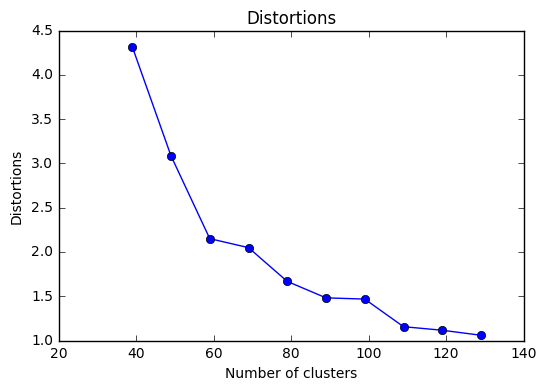

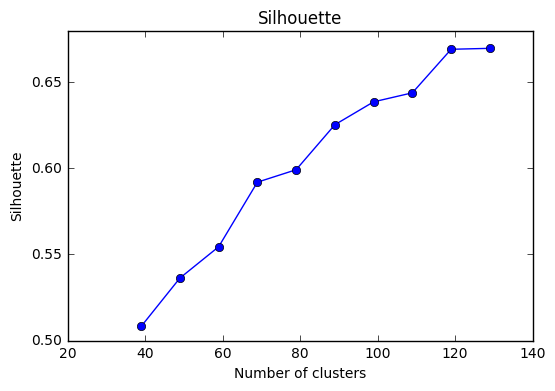

In [4]:
n_of_clusters_and_distortion(data=data)

In [5]:
# The value chosen is 110 (We will use it in the next step)